<div class="alert alert-info">
    <img src="img/download.png" style="width:75px;height:75px;" align="left">
    <img src="img/logo.png" style="width:75px;height:75px;" align="right">
    <h1 align="center">Deep Learning with Tensorflow</h1> 
    <h3 align="center"> lecture 1(fall 2021)</h3>
    <h5 align="center">Fateme Hafezian zade [DL2021](https://fatemehafezi.gnomio.com)</h5>
    
</div>

<h2>Table of Contents</h2>


<ul>
    <li><a href="#Regression_No">Regression without any module </a></li>
    <li><a href="#Regression_pytorch">Regression with tensorflow module</a></li>
    
</ul>


<hr>


<img src="img/1.png" style="width:350px;height:300px;">

<img src="img/images.png" style="width:350px;height:300px;">

<h4 id="Makeup_Data">Make Some Data</h4>


In [46]:
# Import the library PyTorch    loss function

import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt
rng = np.random

In [47]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [48]:
# Parameters.
lr = 0.01
training_steps = 1000
display_step = 50

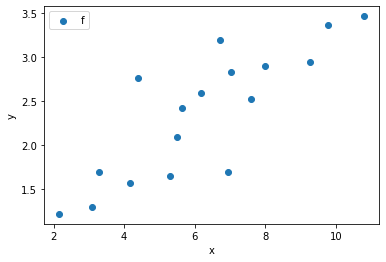

In [49]:
# Plot the line with blue

plt.scatter(X, Y, label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

<h2 id="Model_Cost">Regression without any module</h2>


In [50]:
# Create forward function for prediction

def forward(x):
    return W * x+ b

In [51]:
# Create the MSE function for evaluate the result.

def mean_square(yhat, y):
    return tf.reduce_mean(tf.square(yhat - y))



# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(lr)

# Optimization process. 
def run_optimization():
    
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = forward(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [52]:
# Weight and Bias, initialized randomly.
W = tf.Variable(0.0, name="weight")
b = tf.Variable(0.0, name="bias")
#gradient_plot(Yhat, w, loss.item(), epoch)

In [53]:
#gradient_plot = plot_diagram(X, Y, w, stop = 5)

<h4 id="Train">Train the Model</h4>


In [65]:
# Run training for the given number of steps.

LOSS=[]
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = forward(X)
        loss = mean_square(pred, Y)
        LOSS.append(loss)
        
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.154188, W: 0.258919, b: 0.747162
step: 100, loss: 0.154117, W: 0.258085, b: 0.753071
step: 150, loss: 0.154061, W: 0.257347, b: 0.758304
step: 200, loss: 0.154017, W: 0.256693, b: 0.762939
step: 250, loss: 0.153983, W: 0.256115, b: 0.767043
step: 300, loss: 0.153956, W: 0.255602, b: 0.770677
step: 350, loss: 0.153934, W: 0.255148, b: 0.773895
step: 400, loss: 0.153918, W: 0.254746, b: 0.776745
step: 450, loss: 0.153905, W: 0.254390, b: 0.779269
step: 500, loss: 0.153895, W: 0.254075, b: 0.781504
step: 550, loss: 0.153887, W: 0.253796, b: 0.783484
step: 600, loss: 0.153880, W: 0.253548, b: 0.785237
step: 650, loss: 0.153876, W: 0.253329, b: 0.786789
step: 700, loss: 0.153872, W: 0.253135, b: 0.788163
step: 750, loss: 0.153869, W: 0.252964, b: 0.789381
step: 800, loss: 0.153866, W: 0.252812, b: 0.790459
step: 850, loss: 0.153864, W: 0.252677, b: 0.791414
step: 900, loss: 0.153863, W: 0.252558, b: 0.792259
step: 950, loss: 0.153862, W: 0.252452, b: 0.793008
step: 1000, l

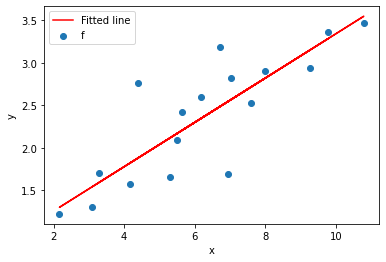

In [63]:
# Plot the line with blue

plt.scatter(X, Y,label = 'f')
plt.plot(X, np.array(W * X + b),'r', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Text(1.5, 0.5, 'Cost')

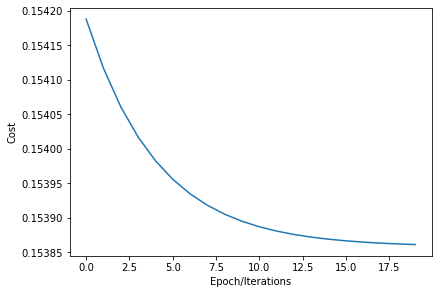

In [67]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<h2 id="Model_Cost">Regression with pytorch module</h2>


In [70]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [71]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [73]:
history = model.fit(X, Y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 741ms/step - loss: 34.1782
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 33.2975
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 32.4287
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 31.5719
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 30.7274
Epoch 6/300
1/1 [==============================] - 0s 7ms/step - loss: 29.8953
Epoch 7/300
1/1 [==============================] - 0s 4ms/step - loss: 29.0758
Epoch 8/300
1/1 [==============================] - 0s 2ms/step - loss: 28.2691
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 27.4753
Epoch 10/300
1/1 [==============================] - 0s 5ms/step - loss: 26.6946
Epoch 11/300
1/1 [==============================] - 0s 4ms/step - loss: 25.9270
Epoch 12/300
1/1 [==============================] - 0s 2ms/step - loss: 25.1727
Epoch 13/300
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 0.1540
Epoch 207/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 208/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 209/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 210/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 211/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 212/300
1/1 [==============================] - 0s 993us/step - loss: 0.1540
Epoch 213/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 214/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1540
Epoch 215/300
1/1 [==============================] - 0s 2ms/step - loss: 0.1540
Epoch 216/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1540
Epoch 217/300
1/1 [==============================] - 0s 3ms/step - loss: 0.1540
Epoch 218/300
1/1 [==============================] -

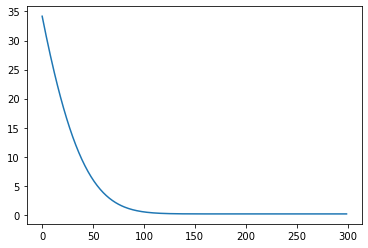

In [74]:
plt.plot(history.history['loss'])
plt.show()

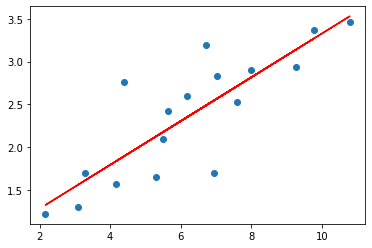

In [76]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X), color='r')
plt.show()
